In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import mpld3
mpld3.enable_notebook()

In [2]:
df_test = pd.read_csv('../../Datasets/Kaggle/Titanic/test.csv')
df = pd.read_csv('../../Datasets/Kaggle/Titanic/train.csv')
df_gender = pd.read_csv('../../Datasets/Kaggle/Titanic/gender_submission.csv')


In [3]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
list(df)

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [5]:
print(len(df))
print(len(df_test))

891
418


In [6]:
df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [7]:
df['Age'].min(),df['Age'].max()

(0.42, 80.0)

In [8]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [9]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [10]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [11]:
df.head(5)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


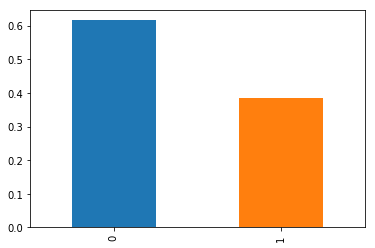

In [12]:
# df.Survived.value_counts().plot(kind="bar")
df.Survived.value_counts(normalize=True).plot(kind="bar")

Text(0.5,1,'Survived')

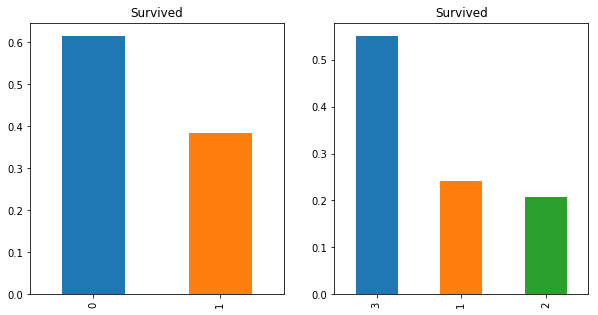

In [13]:
plt.figure(figsize=(10,5))
plt.subplot2grid((1,2), (0,0))
df.Survived.value_counts(normalize=True).plot(kind="bar")
plt.title("Survived")


plt.subplot2grid((1,2), (0,1))
df.Pclass.value_counts(normalize=True).plot(kind="bar")
plt.title("Survived")


Text(0.5,1,'Survived vs age')

TypeError: array([1.]) is not JSON serializable

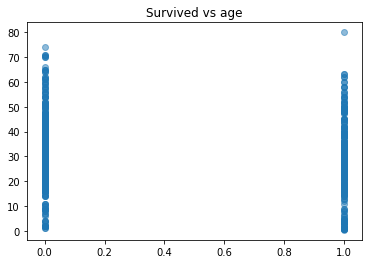

In [14]:

plt.scatter(df.Survived,df.Age, alpha=0.5)
plt.title("Survived vs age")

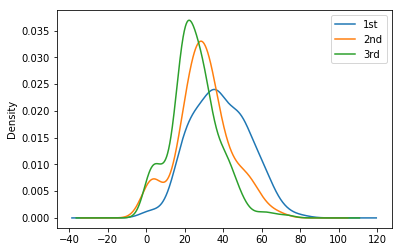

In [15]:
for x in [1,2,3]:
    df.Age[df.Pclass == x].plot(kind="kde")
plt.legend(("1st", "2nd", "3rd"))

Text(0.5,1,'Survived')

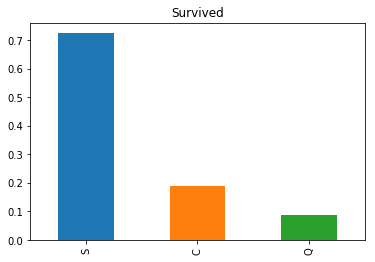

In [16]:
df.Embarked.value_counts(normalize=True).plot(kind="bar")
plt.title("Survived")

Text(0.5,1,'Sex Survived')

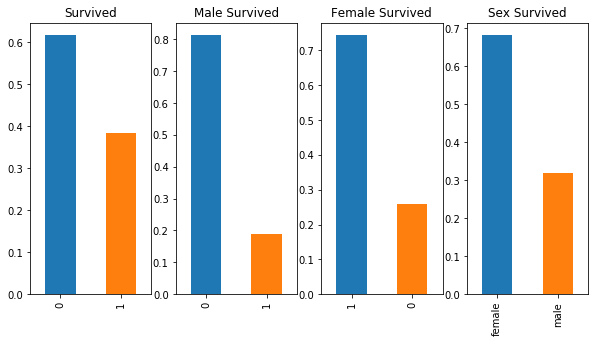

In [17]:
plt.figure(figsize=(10,5))

plt.subplot2grid((1,4), (0,0))
df.Survived.value_counts(normalize=True).plot(kind="bar")
plt.title("Survived")

plt.subplot2grid((1,4), (0,1))
df.Survived[df.Sex=="male"].value_counts(normalize=True).plot(kind="bar")
plt.title("Male Survived")


plt.subplot2grid((1,4), (0,2))
df.Survived[df.Sex=="female"].value_counts(normalize=True).plot(kind="bar")
plt.title("Female Survived")

plt.subplot2grid((1,4), (0,3))
df.Sex[df.Survived==1].value_counts(normalize=True).plot(kind="bar")
plt.title("Sex Survived")

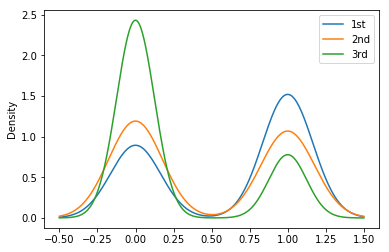

In [18]:
for x in [1,2,3]:
    df.Survived[df.Pclass == x].plot(kind="kde")
plt.legend(("1st", "2nd", "3rd"))

Text(0.5,1,'female poor Survived')

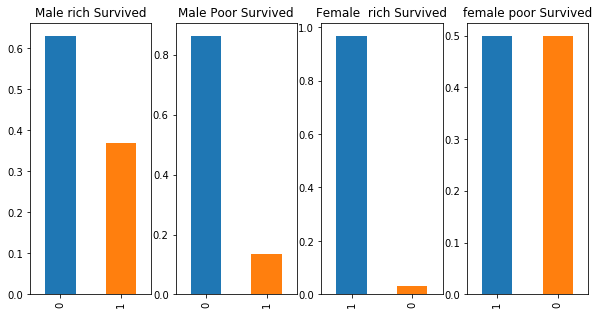

In [19]:
# df.Survived[(df.Sex=="male") & (df.Pclass ==1) ].value_counts(normalize=True).plot(kind="bar")

plt.figure(figsize=(10,5))

plt.subplot2grid((1,4), (0,0))
df.Survived[(df.Sex=="male") & (df.Pclass ==1) ].value_counts(normalize=True).plot(kind="bar")
plt.title("Male rich Survived")

plt.subplot2grid((1,4), (0,1))
df.Survived[(df.Sex=="male") & (df.Pclass ==3) ].value_counts(normalize=True).plot(kind="bar")
plt.title("Male Poor Survived")


plt.subplot2grid((1,4), (0,2))
df.Survived[(df.Sex=="female") & (df.Pclass ==1) ].value_counts(normalize=True).plot(kind="bar")
plt.title("Female  rich Survived")

plt.subplot2grid((1,4), (0,3))
df.Survived[(df.Sex=="female") & (df.Pclass ==3) ].value_counts(normalize=True).plot(kind="bar")
plt.title("female poor Survived")

In [20]:
#clean the data

def clean(data):
    data["Fare"] = data["Fare"].fillna(data["Fare"].dropna().median())
    data["Age"] = data["Age"].fillna(data["Age"].dropna().median())
    
    data.loc[data["Sex"] == "male", "Sex"] = 0
    data.loc[data["Sex"] == "female", "Sex"] = 1   
    
    data["Embarked"] = data["Embarked"].fillna("S")
    data.loc[data["Embarked"] == "S", "Embarked"] = 0
    data.loc[data["Embarked"] == "C", "Embarked"] = 1
    data.loc[data["Embarked"] == "Q", "Embarked"] = 2
    
    
    

In [21]:
from sklearn import linear_model

In [22]:
clean(df)

In [23]:
target = df["Survived"].values

features = df[["Age", "Pclass", "Fare", "Embarked", "Sex", "SibSp", "Parch"]].values

In [24]:


classifier = linear_model.LogisticRegression()
classifier_ = classifier.fit(features, target)

/home/legolas/.local/lib/python2.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [25]:
print(classifier_.score)(features, target)

0.7991021324354658


In [26]:
#Now doing preprocessing to get data clear

In [27]:
from sklearn import preprocessing

In [28]:
poly = preprocessing.PolynomialFeatures(degree=2)  #polynomial degree : quadratic
polynomial_features = poly.fit_transform(features)

classifier_ = classifier.fit(polynomial_features, target)
print(classifier_.score(polynomial_features, target))

0.835016835016835


In [29]:
from sklearn import tree

In [30]:
decision_tree = tree.DecisionTreeClassifier(random_state = 1)
decision_tree_ = decision_tree.fit(features, target)

print(decision_tree_.score)(features,target)

0.9797979797979798


In [30]:
from sklearn import model_selection

In [32]:
scores = model_selection.cross_val_score( decision_tree, features, target, scoring="accuracy", cv=50)

print (scores)
print(scores.mean())

[0.66666667 0.61111111 0.66666667 0.88888889 0.94444444 0.94444444
 0.72222222 0.83333333 0.72222222 0.83333333 0.72222222 0.61111111
 0.72222222 0.77777778 0.72222222 0.83333333 1.         0.66666667
 0.77777778 0.77777778 0.88888889 0.83333333 0.88888889 0.72222222
 0.55555556 0.83333333 0.94444444 0.88888889 0.66666667 0.83333333
 0.72222222 0.66666667 0.88888889 0.94444444 0.88888889 0.77777778
 0.72222222 0.72222222 0.72222222 0.77777778 0.88888889 0.83333333
 0.76470588 0.88235294 0.70588235 0.76470588 0.82352941 0.94117647
 0.88235294 0.875     ]
0.7939052287581698


In [32]:
generalised_tree = tree.DecisionTreeClassifier(random_state = 1, max_depth=7, min_samples_split=2)
generalised_tree_ = generalised_tree.fit(features, target)

print(generalised_tree_.score)(features,target)

scores = model_selection.cross_val_score( generalised_tree_, features, target, scoring="accuracy", cv=50)

print (scores)
print(scores.mean())

0.8787878787878788
[0.77777778 0.66666667 0.77777778 0.94444444 0.83333333 0.88888889
 0.61111111 0.83333333 0.88888889 0.88888889 0.72222222 0.66666667
 0.83333333 0.77777778 0.72222222 0.83333333 0.94444444 0.72222222
 0.94444444 0.83333333 0.88888889 0.88888889 0.83333333 0.88888889
 0.88888889 0.83333333 0.83333333 0.83333333 0.77777778 0.88888889
 0.72222222 0.66666667 0.88888889 0.88888889 0.83333333 0.77777778
 0.72222222 0.66666667 0.88888889 0.77777778 0.83333333 0.88888889
 0.88235294 0.94117647 0.82352941 0.70588235 0.88235294 0.88235294
 1.         0.9375    ]
0.825547385620915


In [37]:
#export tree structure

feature_names = ["Age", "Pclass", "Fare", "Embarked", "Sex", "SibSp", "Parch"]

tree.export_graphviz(generalised_tree_, feature_names=feature_names, out_file="tree.dot")


# to change it png run below command in termial
# dot -Tpng tree.dot > tree.png